In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [20]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1', on_bad_lines='skip')
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

In [21]:
# Select only numeric columns for clustering
X = df.select_dtypes(include=['int64', 'float64']).fillna(0)
print("\nSelected Numeric Features:\n", X.head())


Selected Numeric Features:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        10107               30      95.70                2  2871.00       1   
1        10121               34      81.35                5  2765.90       2   
2        10134               41      94.74                2  3884.34       3   
3        10145               45      83.26                6  3746.70       3   
4        10159               49     100.00               14  5205.27       4   

   MONTH_ID  YEAR_ID  MSRP  
0         2     2003    95  
1         5     2003    95  
2         7     2003    95  
3         8     2003    95  
4        10     2003    95  


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

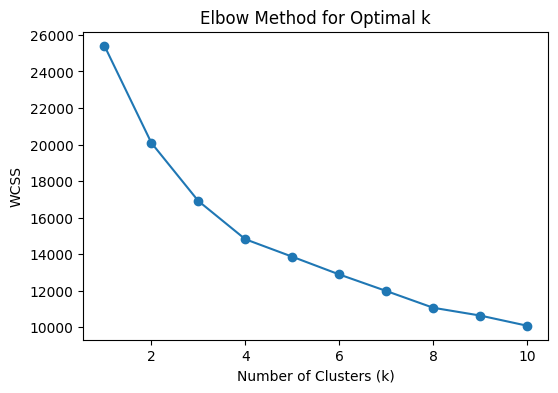

In [24]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

print("\nK-Means Cluster Counts:")
print(df['KMeans_Cluster'].value_counts())


K-Means Cluster Counts:
KMeans_Cluster
1    1183
2     907
0     733
Name: count, dtype: int64


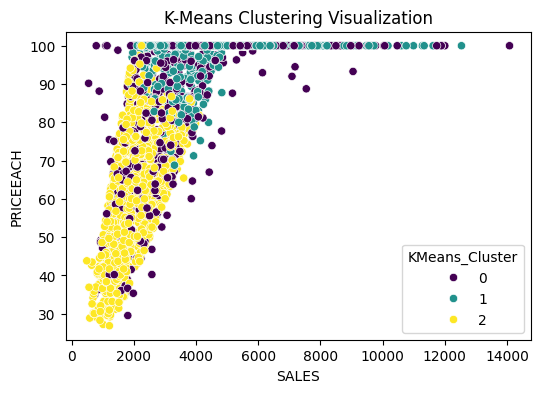

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['SALES'], y=df['PRICEEACH'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()

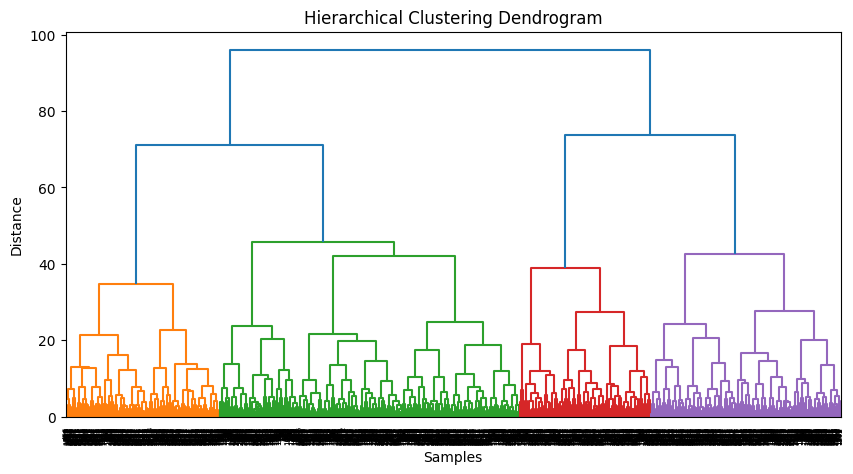

In [28]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [29]:
# Assign cluster labels (here selecting 3 clusters)
df['Hierarchical_Cluster'] = fcluster(Z, t=3, criterion='maxclust')

print("\nHierarchical Cluster Counts:")
print(df['Hierarchical_Cluster'].value_counts())



Hierarchical Cluster Counts:
Hierarchical_Cluster
1    1655
3     690
2     478
Name: count, dtype: int64
